In [1]:
!ls

brain-scan-ADHD.jpeg  sample_data


In [3]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('brain-scan-ADHD.jpeg')
img.shape

(300, 625, 3)

(120, 250, 3)


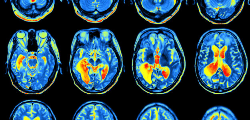

In [8]:
# keeping aspect ratio same 
new_w = int(img.shape[1] / 2.5)
new_h = int(img.shape[0] / 2.5)
image = cv2.resize(img, (new_w,new_h))
print(image.shape)
cv2_imshow(image)

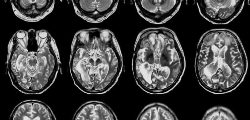

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [17]:
ksize = [-1, 3]
gx = cv2.Sobel(gray,ddepth = cv2.CV_32F, dx=1, dy=0, ksize= ksize[0])
gy = cv2.Sobel(gray,ddepth = cv2.CV_32F, dx=0, dy=1, ksize= ksize[0])
gx = cv2.convertScaleAbs(gx)
gy = cv2.convertScaleAbs(gy)
gx3 = cv2.Sobel(gray,ddepth = cv2.CV_32F, dx=1, dy=0, ksize= ksize[1])
gy3 = cv2.Sobel(gray,ddepth = cv2.CV_32F, dx=0, dy=1, ksize= ksize[1])
gx3 = cv2.convertScaleAbs(gx3)
gy3 = cv2.convertScaleAbs(gy3)
#Sobel-> linear-> ksize = -1
# Scharr -> ksize->3

In [18]:
combine = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)
combine3 = cv2.addWeighted(gx3, 0.5, gy3, 0.5, 0)

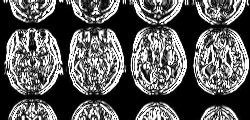

In [19]:
cv2_imshow(gx3)

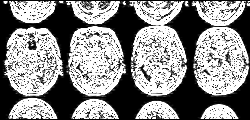

In [20]:
cv2_imshow(gy)

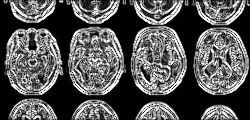

In [21]:
cv2_imshow(combine3)

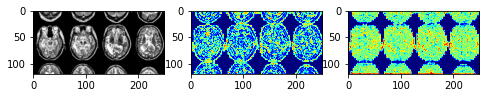

In [38]:
#magnitude = root(x2+y2)
# tan_along_x_and_y * (180/np.pi) % 180
import numpy as np
magnitude = np.sqrt((gx**2) + (gy**2))
import matplotlib.pyplot as plt
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8,4))
axs[0].imshow(gray, cmap='gray')
mag = magnitude.astype(int)
orientation = np.arctan2(gx,gy) * (180/ np.pi) % 180
axs[1].imshow(mag, cmap='jet')
ornt = orientation.astype(int)
axs[2].imshow(ornt, cmap='jet')

array([[ 0.   ,  0.   ,  6.   , ...,  1.   ,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  6.   , ..., 12.04 ,  6.082,  1.   ],
       [ 0.   ,  0.   , 12.41 , ...,  9.484, 12.086, 10.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]],
      dtype=float16)